In [38]:
Num, Name, Week = input("Reg. Number:"), input("Name:"), input("Week:")

Reg. Number:23MCA1001
Name:Yashika Raj
Week:week 8


# **1.Import the libraries**

---



In [32]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost  as  xgb #from xgboost import XGBClassifier
from numpy import hstack
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from collections import Counter

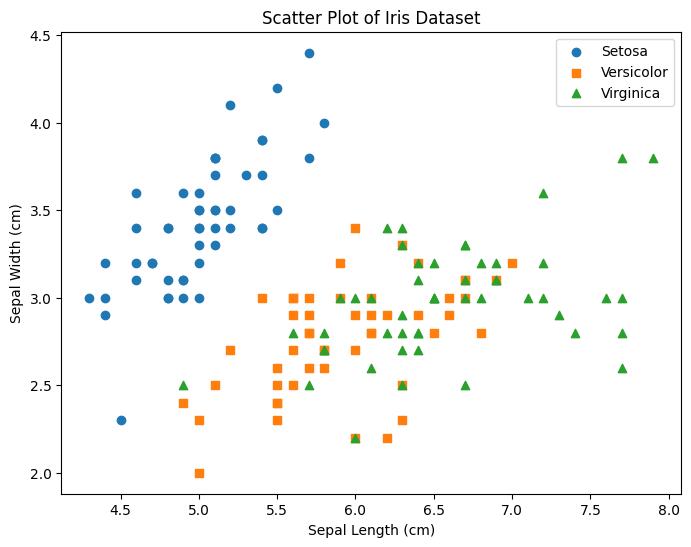

In [45]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
data = iris.data
target = iris.target

# Create a scatter plot
plt.figure(figsize=(8, 6))

# Scatter plot for Setosa (target=0)
plt.scatter(data[target == 0, 0], data[target == 0, 1], label='Setosa', marker='o')

# Scatter plot for Versicolor (target=1)
plt.scatter(data[target == 1, 0], data[target == 1, 1], label='Versicolor', marker='s')

# Scatter plot for Virginica (target=2)
plt.scatter(data[target == 2, 0], data[target == 2, 1], label='Virginica', marker='^')

# Set labels and title
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter Plot of Iris Dataset')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [46]:
# Map numerical labels to class names
class_names = iris.target_names

# Print the class names
for i, class_name in enumerate(class_names):
    print(f"Class {i}: {class_name}")
# Count occurrences of each class label
class_counts = Counter(target)

# Print the count of each class
for class_label, count in class_counts.items():
    class_name = iris.target_names[class_label]
    print(f"{class_name}: {count} samples")

Class 0: setosa
Class 1: versicolor
Class 2: virginica
setosa: 50 samples
versicolor: 50 samples
virginica: 50 samples


In [47]:

X_train, X_test, y_train, y_test = train_test_split(data,target, test_size=0.2, random_state = 42)

In [48]:
print("shapes: ")
print("X_train ", X_train.shape)
print("X_test ", X_test.shape)
print("y_train ", y_train.shape)
print("y_test ", y_test.shape)

shapes: 
X_train  (120, 4)
X_test  (30, 4)
y_train  (120,)
y_test  (30,)


In [49]:


tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
scores = cross_val_score(tree, X_train, y_train, cv=5, scoring="accuracy")
print(f"Decision Tree: Mean Accuracy = {scores.mean():.4f} (Std. Dev. = {scores.std():.4f})")
accuracy=accuracy_score(y_test,tree.predict(X_test));
print(accuracy)

Decision Tree: Mean Accuracy = 0.9417 (Std. Dev. = 0.0565)
1.0


**4.Bagging Algorithm**

**Decision Tree**

---



In [50]:
model=BaggingClassifier(base_estimator=tree,n_estimators=100)
model.fit(X_train,y_train)
accuracy=accuracy_score(y_test,model.predict(X_test));
print(accuracy)

1.0


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


**KNN**

---



In [51]:
knn=KNeighborsClassifier(n_neighbors=3)
model_knn=BaggingClassifier(base_estimator=knn,n_estimators=100)
model_knn.fit(X_train,y_train)
accuracy_knn=accuracy_score(y_test,model_knn.predict(X_test));
print(accuracy_knn)

1.0


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


**Random Forest**

---



In [52]:
rf=RandomForestClassifier(max_depth=2,random_state=0)
model_rf=BaggingClassifier(base_estimator=rf,n_estimators=100)
model_rf.fit(X_train,y_train)
accuracy_rf=accuracy_score(y_test,model_rf.predict(X_test));
print(accuracy_rf)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


1.0


# **5.boosting models**

**GradientBoost**

---



In [53]:
model_gb=GradientBoostingClassifier(learning_rate=.1).fit(X_train,y_train)
accuracy_gb=accuracy_score(y_test,model_gb.predict(X_test));
print(accuracy_gb)
#print(classification_report(y_test(model_gb.predict(X_test))))

1.0


**AdaBoost**

---



In [54]:
model_ab=AdaBoostClassifier(n_estimators=100,random_state=0).fit(X_train,y_train)
accuracy_ab=accuracy_score(y_test,model_gb.predict(X_test));
print(accuracy_ab)

1.0


In [55]:
model_xgb=xgb.XGBClassifier(n_estimators=100,objective='binary:logistic',tree_method='hist',max_depth=3,enable_categorical=True).fit(X_train,y_train)
accuracy_xgb=accuracy_score(y_test,model_xgb.predict(X_test));
print(accuracy_xgb)

1.0


**XGBoost**

---



# **6.Stacking Model**

**Voting**

---



In [56]:
voting=VotingClassifier(estimators=[
    ('dt',DecisionTreeClassifier()),('rf',RandomForestClassifier(max_depth=2,random_state=0)),('knn',KNeighborsClassifier(n_neighbors=3))],voting='hard')

In [57]:
voting.fit(X_train,y_train)
accuracy_voting=accuracy_score(y_test,voting.predict(X_test));
print(accuracy_voting)

1.0


In [58]:
# evaluate each base model
def evaluate_models(models, X_train, X_val, y_train, y_val):
 # fit and evaluate the models
 scores = list()
 for name, model in models:
 # fit the model
  model.fit(X_train, y_train)
 # evaluate the model
  yhat = model.predict(X_val)
  acc = accuracy_score(y_val, yhat)
 # store the performance
  scores.append(acc)
 # report model performance
 return scores

In [59]:
def get_models():
 models = list()
 models.append(('dt', DecisionTreeClassifier()))
 models.append(('rf', RandomForestClassifier(max_depth=2,random_state=0)))
 models.append(('knn',KNeighborsClassifier(n_neighbors=3)))
 return models
models = get_models()
# fit and evaluate each model
scores = evaluate_models(models, X_train, X_test, y_train, y_test)
print(scores)

[1.0, 1.0, 1.0]


**Weighted Average**

---



In [60]:

# create the ensemble
ensemble = VotingClassifier(estimators=models, voting='soft', weights=scores)
# fit the ensemble on the training dataset
ensemble.fit(X_train, y_train)
# make predictions on test set
yhat = ensemble.predict(X_test)
# evaluate predictions
score = accuracy_score(y_test, yhat)
print(score)
print('Weighted Avg Accuracy: %.3f' % (score*100))

1.0
Weighted Avg Accuracy: 100.000


# **Blending stack**

In [61]:
def fit_ensemble(models, X_train, X_val, y_train, y_val):
 # fit all models on the training set and predict on hold out set
 meta_X = list()
 for name, model in models:
 # fit in training set
  model.fit(X_train, y_train)
 # predict on hold out set
  yhat = model.predict(X_val)
 # reshape predictions into a matrix with one column
  yhat = yhat.reshape(len(yhat), 1)
 # store predictions as input for blending
  meta_X.append(yhat)
 # create 2d array from predictions, each set is an input feature
 meta_X = hstack(meta_X)
 # define blending model
 blender = LogisticRegression()
 # fit on predictions from base models
 blender.fit(meta_X, y_val)
 return blender

In [62]:
# make a prediction with the blending ensemble
def predict_ensemble(models, blender, X_test):
 # make predictions with base models
 meta_X = list()
 for name, model in models:
 # predict with base model
  yhat = model.predict(X_test)
 # reshape predictions into a matrix with one column
  yhat = yhat.reshape(len(yhat), 1)
 # store prediction
  meta_X.append(yhat)
 # create 2d array from predictions, each set is an input feature
 meta_X = hstack(meta_X)
 # predict
 return blender.predict(meta_X)

In [63]:
models = get_models()
# train the blending ensemble
blender = fit_ensemble(models, X_train, X_test, y_train, y_test)
# make predictions on test set
yhat = predict_ensemble(models, blender, X_test)
# evaluate predictions
score = accuracy_score(y_test, yhat)
print(score)
print('Blending Accuracy: %.3f' % (score*100))

1.0
Blending Accuracy: 100.000


# **Displaying all the models**

---



---



In [65]:
models = {
    "Decision tree":tree,
    "Bagging-DT":model,
    "Baggig-KNN":knn ,
    "Bagging-RF":rf,
    "Boosting-gb":model_gb,
    "Boosting-ada":model_ab,
    "Boosting-xgb":model_xgb,
    "Stacking-voting":voting,
    "Stacking-weighted_avg":ensemble,
    "Stacking-blendind":blender
}

# Train and evaluate models
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

# Print accuracies
for name, accuracy in accuracies.items():
    print(f"{name} Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decision tree Accuracy: 1.0
Bagging-DT Accuracy: 1.0
Baggig-KNN Accuracy: 1.0
Bagging-RF Accuracy: 1.0
Boosting-gb Accuracy: 1.0
Boosting-ada Accuracy: 1.0
Boosting-xgb Accuracy: 1.0
Stacking-voting Accuracy: 1.0
Stacking-weighted_avg Accuracy: 1.0
Stacking-blendind Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **7.INFERENCE**

---



---



# **Simplicity of the dataset: The Iris dataset is relatively simple, with distinct classes and features that is well-separated(linearly separable) and there is balanced class(every class has same number of data samples). As a result, even simple models like decision trees might perform quite well. Ensembling techniques like Random Forests or Gradient Boosting might not offer significant improvements on such a dataset. So all the models are giving same accuracy**

---



---



# **8.BREAST-CANCER DATA-SET**


In [66]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [67]:
breast_cancer=load_breast_cancer()
data = breast_cancer.data
target = breast_cancer.target
df=pd.DataFrame(data,target)
df.head(30)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890
0,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902
0,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758
0,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300
0,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678
0,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
0,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368
0,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510
0,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720
0,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750


In [68]:
# Map numerical labels to class names
class_names = breast_cancer.target_names

# Print the class names
for i, class_name in enumerate(class_names):
    print(f"Class {i}: {class_name}")
# Count occurrences of each class label
class_counts = Counter(target)

# Print the count of each class
for class_label, count in class_counts.items():
    class_name =breast_cancer.target_names[class_label]
    print(f"{class_name}: {count} samples")

Class 0: malignant
Class 1: benign
malignant: 212 samples
benign: 357 samples


# **9.SPLITIG DATA SET**

In [69]:
X_train, X_test, y_train, y_test = train_test_split(data,target, test_size=0.2, random_state = 42)
print("shapes: ")
print("X_train ", X_train.shape)
print("X_test ", X_test.shape)
print("y_train ", y_train.shape)
print("y_test ", y_test.shape)

shapes: 
X_train  (455, 30)
X_test  (114, 30)
y_train  (455,)
y_test  (114,)


In [70]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
scores = cross_val_score(tree, X_train, y_train, cv=5, scoring="accuracy")
print(f"Decision Tree: Mean Accuracy = {scores.mean():.4f} (Std. Dev. = {scores.std():.4f})")
accuracy=accuracy_score(y_test,tree.predict(X_test));
print(accuracy)

Decision Tree: Mean Accuracy = 0.9187 (Std. Dev. = 0.0149)
0.9473684210526315


In [71]:
model=BaggingClassifier(estimator=tree,n_estimators=100)
model.fit(X_train,y_train)
accuracy=accuracy_score(y_test,model.predict(X_test));
print(accuracy)

0.956140350877193


In [73]:
rf=RandomForestClassifier(max_depth=2,random_state=0)
model_rf=BaggingClassifier(estimator=rf,n_estimators=100)
model_rf.fit(X_train,y_train)
accuracy_rf=accuracy_score(y_test,model_rf.predict(X_test));
print(accuracy_rf)

0.9649122807017544


In [74]:
knn=KNeighborsClassifier(n_neighbors=3)
model_knn=BaggingClassifier(estimator=knn,n_estimators=100)
model_knn.fit(X_train,y_train)
accuracy_knn=accuracy_score(y_test,model_knn.predict(X_test));
print(accuracy_knn)

0.9385964912280702


In [75]:
model_gb=GradientBoostingClassifier(learning_rate=.1).fit(X_train,y_train)
accuracy_gb=accuracy_score(y_test,model_gb.predict(X_test));
print(accuracy_gb)

0.956140350877193


In [76]:
model_ab=AdaBoostClassifier(n_estimators=100,random_state=0).fit(X_train,y_train)
accuracy_ab=accuracy_score(y_test,model_ab.predict(X_test));
print(accuracy_ab)

0.9736842105263158


In [77]:
model_xgb=xgb.XGBClassifier(n_estimators=100,objective='binary:logistic',tree_method='hist',max_depth=3,enable_categorical=True).fit(X_train,y_train)
accuracy_xgb=accuracy_score(y_test,model_xgb.predict(X_test));
print(accuracy_xgb)

0.956140350877193


In [78]:
voting=VotingClassifier(estimators=[
    ('dt',DecisionTreeClassifier()),('rf',RandomForestClassifier(max_depth=2,random_state=0)),('knn',KNeighborsClassifier(n_neighbors=3))],voting='hard')

In [79]:
voting.fit(X_train,y_train)
accuracy_voting=accuracy_score(y_test,voting.predict(X_test));
print(accuracy_voting)

0.9649122807017544


In [80]:
# evaluate each base model
def evaluate_models(models, X_train, X_val, y_train, y_val):
 # fit and evaluate the models
 scores = list()
 for name, model in models:
 # fit the model
  model.fit(X_train, y_train)
 # evaluate the model
  yhat = model.predict(X_val)
  acc = accuracy_score(y_val, yhat)
 # store the performance
  scores.append(acc)
 # report model performance
 return scores

In [81]:
def get_models():
 models = list()
 models.append(('dt', DecisionTreeClassifier()))
 models.append(('rf', RandomForestClassifier(max_depth=2,random_state=0)))
 models.append(('knn',KNeighborsClassifier(n_neighbors=3)))
 models.append(('lg',LogisticRegression()))
 return models
models = get_models()
# fit and evaluate each model
scores = evaluate_models(models, X_train, X_test, y_train, y_test)
print(scores)

[0.9473684210526315, 0.9649122807017544, 0.9298245614035088, 0.9649122807017544]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [82]:
# create the ensemble
ensemble = VotingClassifier(estimators=models, voting='soft', weights=scores)
# fit the ensemble on the training dataset
ensemble.fit(X_train, y_train)
# make predictions on test set
yhat = ensemble.predict(X_test)
# evaluate predictions
score = accuracy_score(y_test, yhat)
print(score)
print('Weighted Avg Accuracy: %.3f' % (score*100))

0.9649122807017544
Weighted Avg Accuracy: 96.491


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [83]:
def fit_ensemble(models, X_train, X_val, y_train, y_val):
 # fit all models on the training set and predict on hold out set
 meta_X = list()
 for name, model in models:
 # fit in training set
  model.fit(X_train, y_train)
 # predict on hold out set
  yhat = model.predict(X_val)
 # reshape predictions into a matrix with one column
  yhat = yhat.reshape(len(yhat), 1)
 # store predictions as input for blending
  meta_X.append(yhat)
 # create 2d array from predictions, each set is an input feature
 meta_X = hstack(meta_X)
 # define blending model
 blender = MLPClassifier(random_state=1, max_iter=1000)
 # fit on predictions from base models
 blender.fit(meta_X, y_val)
 return blender

In [84]:
## make a prediction with the blending ensemble
def predict_ensemble(models, blender, X_test):
 # make predictions with base models
 meta_X = list()
 for name, model in models:
 # predict with base model
  yhat = model.predict(X_test)
 # reshape predictions into a matrix with one column
  yhat = yhat.reshape(len(yhat), 1)
 # store prediction
  meta_X.append(yhat)
 # create 2d array from predictions, each set is an input feature
 meta_X = hstack(meta_X)
 # predict
 return blender.predict(meta_X)

In [85]:
models = get_models()
# train the blending ensemble
blender = fit_ensemble(models, X_train, X_test, y_train, y_test)
# make predictions on test set
yhat = predict_ensemble(models, blender, X_test)
# evaluate predictions
score = accuracy_score(y_test, yhat)
print(score)
print('Blending Accuracy: %.3f' % (score*100))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9649122807017544
Blending Accuracy: 96.491


# **Displaying all the models**

---



In [86]:
models = {
    "Decision tree":tree,
    "Bagging-DT":model,
    "Baggig-KNN":knn ,
    "Bagging-RF":rf,
    "Boosting-gb":model_gb,
    "Boosting-ada":model_ab,
    "Boosting-xgb":model_xgb,
    "Stacking-voting":voting,
    "Stacking-weighted_avg":ensemble,
    "Stacking-blendind":blender
}

# Train and evaluate models
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

# Print accuracies
for name, accuracy in accuracies.items():
    print(f"{name} Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decision tree Accuracy: 0.9385964912280702
Bagging-DT Accuracy: 0.956140350877193
Baggig-KNN Accuracy: 0.9298245614035088
Bagging-RF Accuracy: 0.9649122807017544
Boosting-gb Accuracy: 0.956140350877193
Boosting-ada Accuracy: 0.9736842105263158
Boosting-xgb Accuracy: 0.956140350877193
Stacking-voting Accuracy: 0.9649122807017544
Stacking-weighted_avg Accuracy: 0.9649122807017544
Stacking-blendind Accuracy: 0.9385964912280702


# **INFERENCE **

---



---



# **The success of Adaboost on the breast_cancer dataset followed by RandomForest could be attributed to its ability to handle imbalanced data, capture complex decision boundaries, reduce bias and variance, robustness to noise, effective feature selection, and optimal parameter tuning**

# **The breast_cancer dataset  have imbalanced classes, meaning  class benign tumors significantly outnumbers the other. Adaboost tends to perform well on imbalanced datasets by focusing more on misclassified instances, thus effectively handling class imbalances.**

---



In [39]:
from google.colab import auth
auth.authenticate_user()
import requests
gcloud_token = !gcloud auth print-access-token
gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
user = gcloud_tokeninfo['email']
import datetime
dt = datetime.datetime.now()
x = str(dt).split('.')[0]
print(f"This Script is executed by: ",user, "at", x)

This Script is executed by:  yashikaraj23@gmail.com at 2024-03-19 17:57:04
